### function transformer 
 -  normalize the data if data is not normalize

1. ap k pass data  hy. or us k boht sary column hyn. un me se kuch column use krna chahty hyn. 
lakin un  column ka data normalize nahi hyn bal k non-normalize hy.

2. ya phr ap ka data ka pattern kafi bara hy. hum scalling kr k bhi dekhty hyn tab bhi

hmara data ka pattern change nahi ho pata. 

3. some time ap k pass data celcius me hota hy or ap us ko kelvin me convert krna chahty hyn

4. ya phr ap k pass centimeter me data hy or us ko ap meter me convert krna chahty hyn.

to us k lye bhi hum function transformer use kr skty hyn

In [2]:
import pandas as pd
dataset = pd.read_csv("loan.csv")
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataset.isnull().sum()

C:\Users\Aahil Khan\AppData\Local\Temp\ipykernel_43664\1899262194.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])


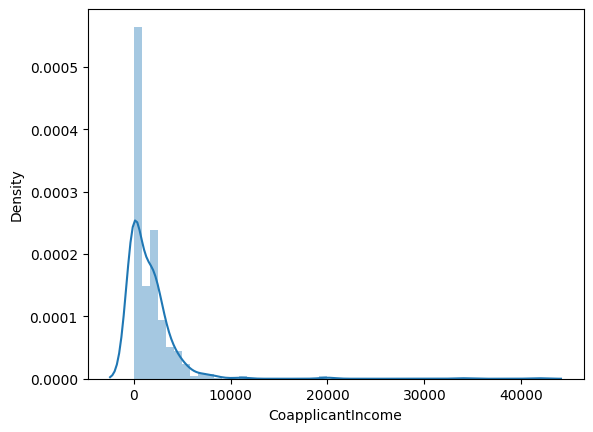

In [5]:
sns.distplot(dataset["CoapplicantIncome"])
plt.show()

In [6]:
q1 = dataset["CoapplicantIncome"].quantile(0.25)
q3 = dataset["CoapplicantIncome"].quantile(0.75)
iqr = q3-q1

In [7]:

min_range = q1-1.5*iqr
max_range = q3+1.5*iqr
min_range,max_range

(-3445.875, 5743.125)

In [8]:
new_dataset = dataset[dataset["CoapplicantIncome"]<=max_range]

In [9]:
new_dataset.shape

(596, 13)

C:\Users\Aahil Khan\AppData\Local\Temp\ipykernel_43664\3647169822.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_dataset["CoapplicantIncome"])


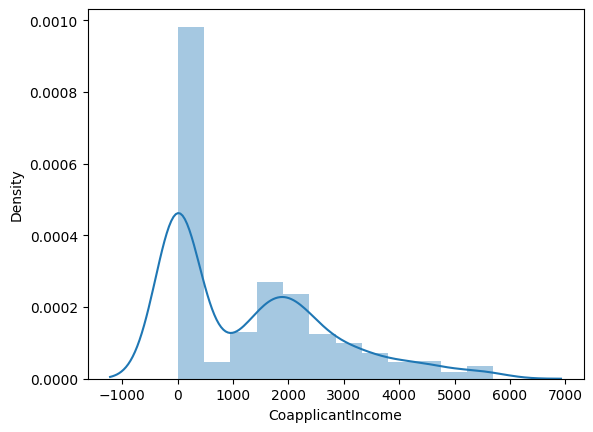

In [10]:
sns.distplot(new_dataset["CoapplicantIncome"])
plt.show()

In [11]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

In [12]:
# jab bhi FunctionTransformer use kry gy to is k ander func btana prta hy k kon sa function 
# use kr k ap ne data ki transformation krni hy
# example , power, log base 10, log1p, log base e etc
# log1p matlb k hr 1 value ko ap 1 me se minus kry gy. 
# wese ager ap log base 10 lety hyn or hmary pass data me zero a jata hy. to log(0) lyn gy
# to is ka answer invalid ata hy(mean zero data hmary kisi kam ka nahi rahy ga)
# lakin ager log1p ly na to 0 ko pehly 1 se minus kry gy to is ka jo bhi answer ae ga wo use ho jae ga.

# The term "log e base" refers to the natural logarithm, which is the logarithm with base e. The value 
# of e is approximately 2.71828, and the natural logarithm function ln(x) is the inverse function of 
# the exponential function e^x. In mathematical notation, log base e is often denoted as ln(x), where 
# x is the argument of the logarithm.

ft = FunctionTransformer(func=np.log1p)

In [13]:
ft.fit(new_dataset["CoapplicantIncome"])
new_dataset["transform"] = ft.transform(new_dataset["CoapplicantIncome"])

In [15]:
#new_dataset["transform"] = new_dataset_fit
#new_dataset.head(10)

C:\Users\Aahil Khan\AppData\Local\Temp\ipykernel_43664\479334114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset["transform"] = new_dataset_fit


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,transform
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,7.319202
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0.000000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,7.765993
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.000000
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,8.342125
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,7.324490
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,7.826044
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,7.331060
10,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y,6.552508


C:\Users\Aahil Khan\AppData\Local\Temp\ipykernel_43664\3839918092.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_dataset["transform"])


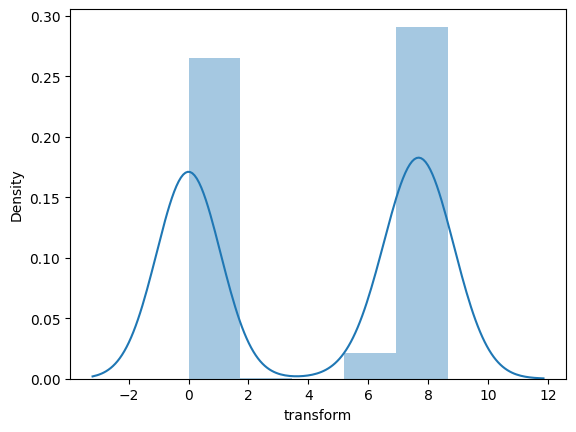

In [16]:
sns.distplot(new_dataset["transform"])
plt.show()

In [24]:



ft2 = FunctionTransformer(func=np.log1p)
ft2.fit(dataset["CoapplicantIncome"])
dataset["dataset_fit"] = ft.transform(dataset["CoapplicantIncome"])



C:\Users\Aahil Khan\AppData\Local\Temp\ipykernel_43664\4210138220.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])


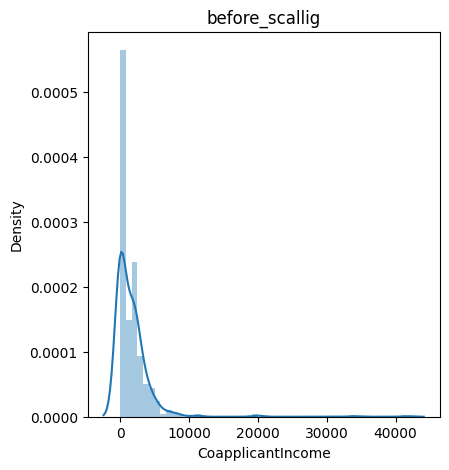

C:\Users\Aahil Khan\AppData\Local\Temp\ipykernel_43664\4210138220.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["dataset_fit"])


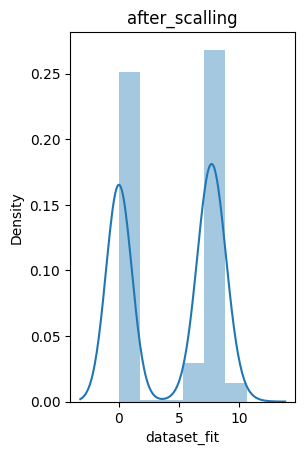

In [28]:
### performing feature scalling without removing outliers
### ager humy outliers k pass important information hy to phr remove nahi kry gy
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("before_scallig")
sns.distplot(dataset["CoapplicantIncome"])
plt.show()

plt.subplot(1,2,2)
plt.title("after_scalling")
sns.distplot(dataset["dataset_fit"])
plt.show()


C:\Users\Aahil Khan\AppData\Local\Temp\ipykernel_43664\845326350.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["CoapplicantIncome"])


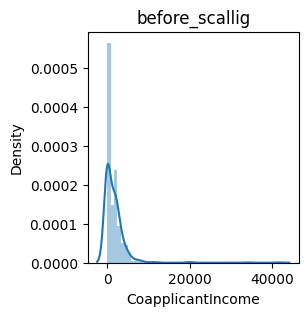

C:\Users\Aahil Khan\AppData\Local\Temp\ipykernel_43664\845326350.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["data_fit"])


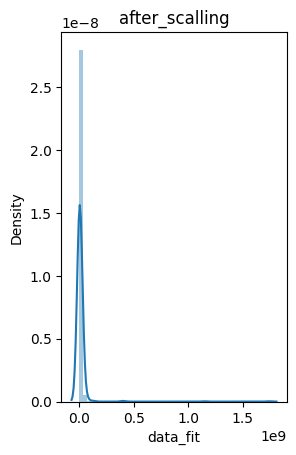

In [32]:
# using power in function transformation
data = pd.read_csv("loan.csv")

ft3 = FunctionTransformer(func=lambda x: x**2)

ft3.fit(data["CoapplicantIncome"])
data["data_fit"] = ft3.transform(data["CoapplicantIncome"])


# figures
plt.figure(figsize=(6,3))

plt.subplot(1,2,1)
plt.title("before_scallig")
sns.distplot(data["CoapplicantIncome"])
plt.show()

plt.subplot(1,2,2)
plt.title("after_scalling")
sns.distplot(data["data_fit"])
plt.show()

C:\Users\Aahil Khan\AppData\Local\Temp\ipykernel_43664\1626515193.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["data_fit"] = ft3.transform(data["CoapplicantIncome"])
C:\Users\Aahil Khan\AppData\Local\Temp\ipykernel_43664\1626515193.py:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["CoapplicantIncome"])


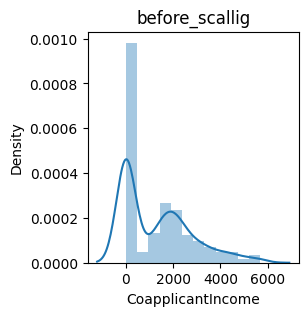

C:\Users\Aahil Khan\AppData\Local\Temp\ipykernel_43664\1626515193.py:33: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["data_fit"])


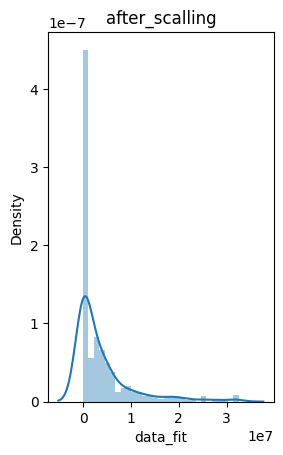

In [34]:
# using power in function transformation without outliers
dataset = pd.read_csv("loan.csv")




q1 = dataset["CoapplicantIncome"].quantile(0.25)
q3 = dataset["CoapplicantIncome"].quantile(0.75)
iqr = q3-q1

min_range = q1-1.5*iqr
max_range = q3+1.5*iqr
min_range,max_range

data = dataset[dataset["CoapplicantIncome"]<=max_range]

dt = FunctionTransformer(func=lambda x: x**2)

ft3.fit(data["CoapplicantIncome"])
data["data_fit"] = ft3.transform(data["CoapplicantIncome"])


# figures
plt.figure(figsize=(6,3))

plt.subplot(1,2,1)
plt.title("before_scallig")
sns.distplot(data["CoapplicantIncome"])
plt.show()

plt.subplot(1,2,2)
plt.title("after_scalling")
sns.distplot(data["data_fit"])
plt.show()

oper wali figure me ager dekhy to hmara data normal distribution me a chuka hy.
q k hmari curve khatm ho gai hy.

To isi trhan humy bhi different different method laga kr check krna ho ga.